# Librerias

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import scipy.stats as stats
import datetime
warnings.filterwarnings('ignore')
import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_squared_error)
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from tensorflow import keras 
from xgboost import XGBRegressor


## Lectura de datos 

In [9]:
data = pd.read_excel("Fallos.xlsx", engine="openpyxl")

In [10]:
df = data

In [4]:
df

,mcodes,terminal,estado_terminal,producto_red,tecnologiapp,modelopp,tecnologiaaf,modeloaf,browser,nombretipoter,...,cantidad_falla_m2,cantidad_falla_mes1,antiguedad_creacion_terminal,antiguedad_version,antiguedad_compra_pos,antiguedad_puesta_pos,clase_falla,fallo,fecha_fallo,fecha_observacion
0,33377982,1062A26IO473,Activo,g,b,l,c,j,j,g,...,6,9,670,131,1068,49,a,0,NaN,6/10/2018
1,40596786,1383G8382195,Activo,e,b,l,c,j,j,d,...,3,6,2123,199,1068,0,a,1,25/10/2018 10:12,6/10/2018
2,47126784,1257A3QLV919,Activo,g,b,l,c,j,j,g,...,0,0,372,372,785,0,a,0,NaN,6/10/2018
3,35334915,1301F6964522,Activo,u,b,l,c,j,i,g,...,0,0,2216,379,1298,0,a,1,22/10/2018 17:45,6/10/2018
4,45002415,1693A39LE695,Activo,g,b,l,c,j,j,g,...,0,3,463,75,837,75,a,0,NaN,6/10/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199993,39168168,1921A2WOX254,Activo,o,b,d,c,c,j,g,...,0,0,531,83,656,83,a,0,NaN,15/10/2018
199994,42799644,102240269351,Activo,k,a,j,b,i,j,i,...,6,6,1467,146,655,74,a,0,NaN,15/10/2018
199995,31818975,107349350777,Activo,f,b,d,c,c,j,d,...,3,0,7903,41,108,0,a,0,NaN,15/10/2018
199996,39168168,1866A2WP2351,Activo,o,b,d,c,c,j,g,...,0,0,531,173,1203,173,a,0,NaN,15/10/2018


En primer lugar se analiza que porcentaje de los datos tienen datos faltantes

In [5]:
df.isnull().sum()/len(data) * 100

mcodes                           0.000000
terminal                         0.000000
estado_terminal                  0.000000
producto_red                     0.000000
tecnologiapp                     0.000000
modelopp                         0.000000
tecnologiaaf                     0.000000
modeloaf                         0.000000
browser                          0.000000
nombretipoter                    0.000000
grupo_version                    0.000000
mcc                              0.000000
grupo_version_ant                0.000000
ciudadfin                        0.000000
trx_dia_cero                     0.000000
trx_dia_uno                      0.000000
trx_dia_dos                      0.000000
trx_dia_tres                     0.000000
trx_dia_cuatro                   0.000000
trx_dia_cinco                    0.000000
trx_dia_seis                     0.000000
trx_mes_tres                     0.000000
trx_mes_dos                      0.000000
trx_mes_uno                      0

**fecha_fallo**  tiene un valor de $96 \%$ de datos vacíos. Se tiene un fuerte desbalance en la variable objetivo

Lo siguiente que se hace es ver los tipos de datos para poder hacer un análisis adecuado de valores atípicos en las variables.

In [6]:
df.dtypes

mcodes                            int64
terminal                         object
estado_terminal                  object
producto_red                     object
tecnologiapp                     object
modelopp                         object
tecnologiaaf                     object
modeloaf                         object
browser                          object
nombretipoter                    object
grupo_version                    object
mcc                              object
grupo_version_ant                object
ciudadfin                        object
trx_dia_cero                      int64
trx_dia_uno                       int64
trx_dia_dos                       int64
trx_dia_tres                      int64
trx_dia_cuatro                    int64
trx_dia_cinco                     int64
trx_dia_seis                      int64
trx_mes_tres                      int64
trx_mes_dos                       int64
trx_mes_uno                       int64
prom_mes_tres                   float64


**1. Explore cuantitativamente y grafique los datos para verificar si las variables disponibles brindan información sobre la variable "fallo"**

## Análisis de variables Explicativas 

### Variables Numéricas

Se hace análisis univariado de caracterización de variables

In [11]:
numerical_data = df.select_dtypes(['int64', "float64"])
# Se elimina la variable mcodes, dado que tiene la función de indentificador
numerical_data = numerical_data.drop(["mcodes"], axis=1)
numerical_data

,trx_dia_cero,trx_dia_uno,trx_dia_dos,trx_dia_tres,trx_dia_cuatro,trx_dia_cinco,trx_dia_seis,trx_mes_tres,trx_mes_dos,trx_mes_uno,...,prom_mes_uno,total_terminales,cantidad_falla_m3,cantidad_falla_m2,cantidad_falla_mes1,antiguedad_creacion_terminal,antiguedad_version,antiguedad_compra_pos,antiguedad_puesta_pos,fallo
0,63,0,0,0,0,3,57,186,660,66,...,3.666667,21,9,6,9,670,131,1068,49,0
1,39,57,54,48,24,6,0,855,960,228,...,12.666667,12,0,3,6,2123,199,1068,0,1
2,3,9,6,3,9,12,0,186,300,42,...,2.333333,36,0,0,0,372,372,785,0,0
3,9,30,21,18,12,24,0,495,390,114,...,6.333333,3,0,0,0,2216,379,1298,0,1
4,18,21,3,21,3,9,6,117,180,75,...,4.166667,33,3,0,3,463,75,837,75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199993,0,0,0,3,0,3,6,75,51,33,...,0.733333,105,6,0,0,531,83,656,83,0
199994,201,171,126,255,192,222,180,5706,7047,3282,...,72.933333,15,3,6,6,1467,146,655,74,0
199995,0,0,3,3,0,0,18,1257,903,429,...,9.533333,3,3,3,0,7903,41,108,0,0
199996,0,0,0,6,12,3,3,60,66,48,...,1.066667,105,6,0,0,531,173,1203,173,0


Se hace una matriz de correlación triangular, dada la naturaleza de la matriz simétrica, se hace triangular. Se analiza si se pueden encontrar patrones adyacentes a los datos

Text(0.5, 1.0, 'Mapa de calor de Correlación')

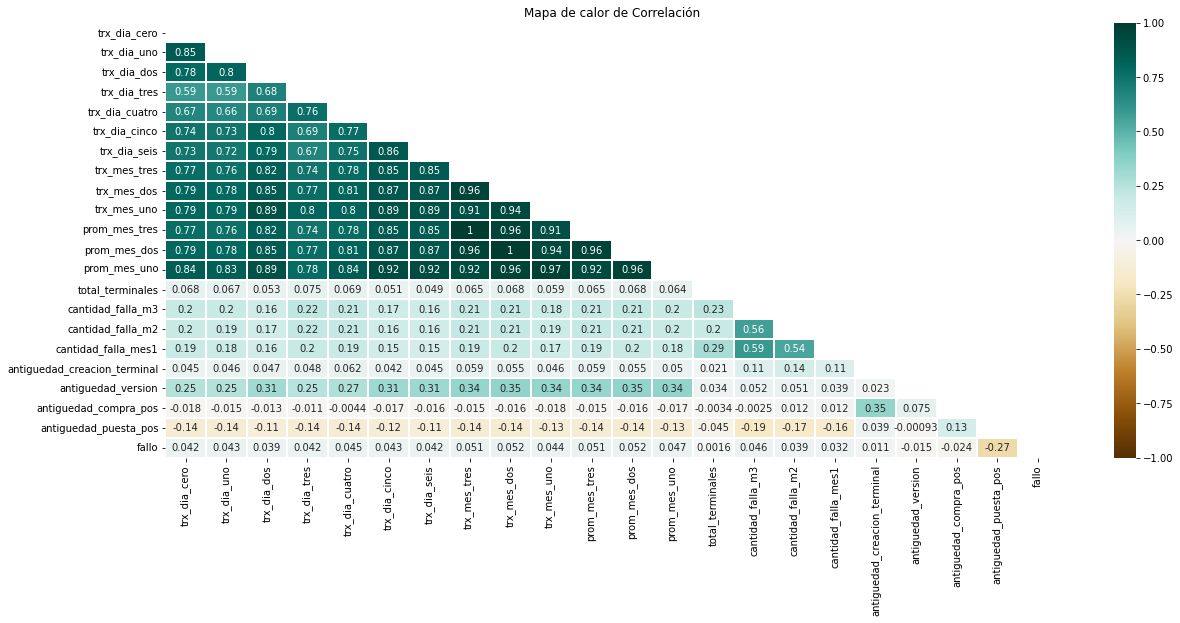

In [8]:
plt.figure(figsize=(20,8))

# Se define una mascara para el trinagulo
mask = np.triu(np.ones_like(numerical_data.corr(), dtype=np.bool))
heatmap = sns.heatmap(
    numerical_data.corr(),
    mask = mask,
    vmin=-1,
    vmax=1,
    annot=True,
    cmap="BrBG",
    linewidths=2
)

heatmap.set_title("Mapa de calor de Correlación", fontdict={"fontsize":12})


Se puede hacer una descripción de los datos que da una idea inicial sobre su distribución.

In [12]:
numerical_data.describe().applymap(lambda x: f"{x:0.2f}")

,trx_dia_cero,trx_dia_uno,trx_dia_dos,trx_dia_tres,trx_dia_cuatro,trx_dia_cinco,trx_dia_seis,trx_mes_tres,trx_mes_dos,trx_mes_uno,...,prom_mes_uno,total_terminales,cantidad_falla_m3,cantidad_falla_m2,cantidad_falla_mes1,antiguedad_creacion_terminal,antiguedad_version,antiguedad_compra_pos,antiguedad_puesta_pos,fallo
count,199998.00,199998.00,199998.00,199998.00,199998.00,199998.00,199998.00,199998.00,199998.00,199998.00,...,199998.00,199998.00,199998.00,199998.00,199998.00,199998.00,199998.00,199998.00,199998.00,199998.00
mean,15.63,15.29,19.06,18.02,20.26,17.68,16.09,532.80,542.85,209.94,...,5.86,11.53,2.44,2.56,2.05,1642.42,2005.58,1344.76,164.66,0.04
std,39.75,38.65,47.18,44.84,47.77,44.74,41.69,1180.93,1188.24,482.81,...,13.30,71.36,7.41,9.11,7.37,1564.29,7974.83,717.22,122.53,0.19
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,3.00,3.00,...,0.07,3.00,0.00,0.00,0.00,5.00,0.00,18.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,60.00,63.00,24.00,...,0.62,3.00,0.00,0.00,0.00,468.00,168.00,656.00,54.00,0.00
50%,3.00,3.00,6.00,3.00,6.00,6.00,3.00,174.00,180.00,66.00,...,1.90,3.00,0.00,0.00,0.00,1169.00,423.00,1307.00,164.00,0.00
75%,15.00,15.00,18.00,15.00,18.00,15.00,15.00,510.00,525.00,198.00,...,5.53,9.00,3.00,0.00,0.00,2315.00,699.00,1996.00,273.00,0.00
max,1605.00,1539.00,2031.00,1866.00,1590.00,1998.00,2175.00,39150.00,41121.00,19074.00,...,466.20,9333.00,153.00,171.00,123.00,9416.00,43387.00,2743.00,1211.00,1.00


Dentro de la correlación pintada anteriormente se puede evidenciar tres grupos con relaciones interesantes. El primero grupo corresponde a la cantidad de transacciones por día


Text(0.5, 1.0, 'Mapa de calor de Correlación')

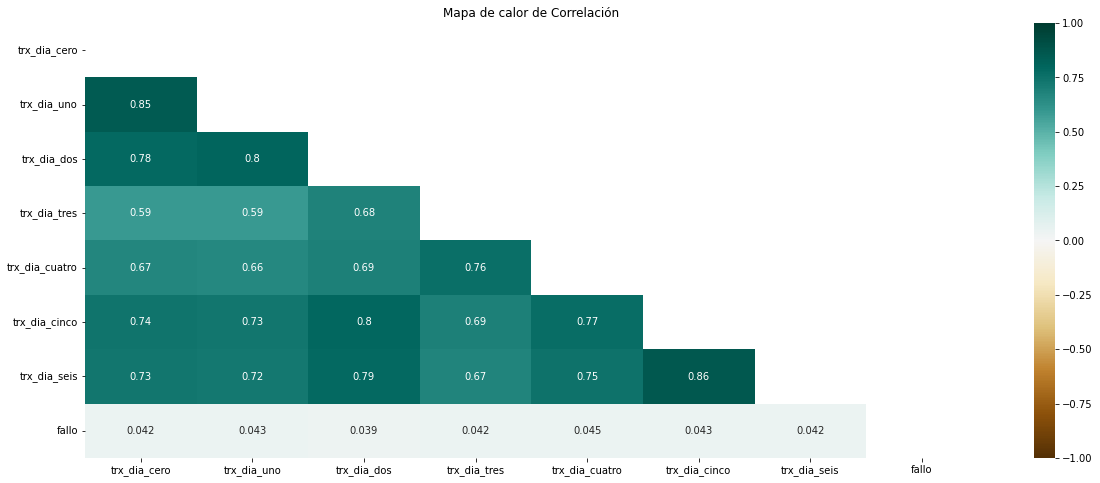

In [10]:
trx = ["trx_dia_cero",
       "trx_dia_uno", 
       "trx_dia_dos", 
       "trx_dia_tres",
       "trx_dia_cuatro",
       "trx_dia_cinco", 
       "trx_dia_seis",
       "fallo"]

plt.figure(figsize=(20,8))

# Se define una mascara para el trinagulo
mask = np.triu(np.ones_like(df[trx].corr(), dtype=np.bool))
heatmap = sns.heatmap(
    df[trx].corr(),
    mask = mask,
    vmin=-1,
    vmax=1,
    annot=True,
    cmap="BrBG"
)

heatmap.set_title("Mapa de calor de Correlación", fontdict={"fontsize":12})



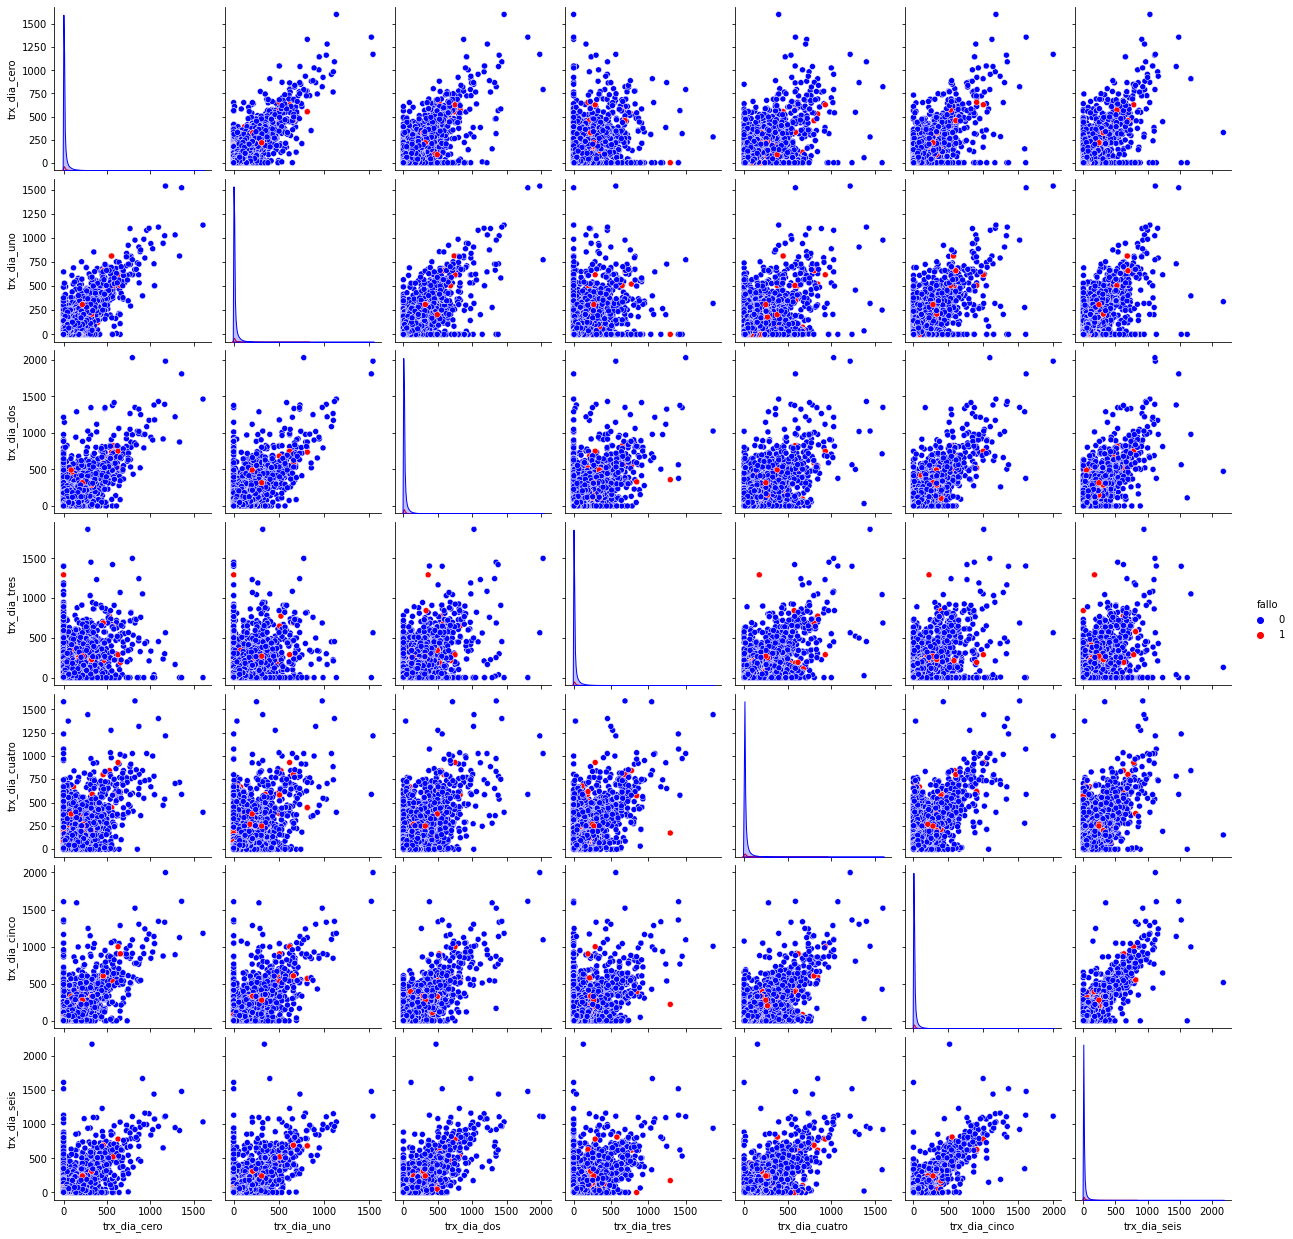

In [11]:
sns.pairplot(df[trx], hue="fallo", palette=["b", "r"])

Ahora se analiza la cantidad de fallos en los meses para ver si existe relación

Text(0.5, 1.0, 'Mapa de calor de Correlación')

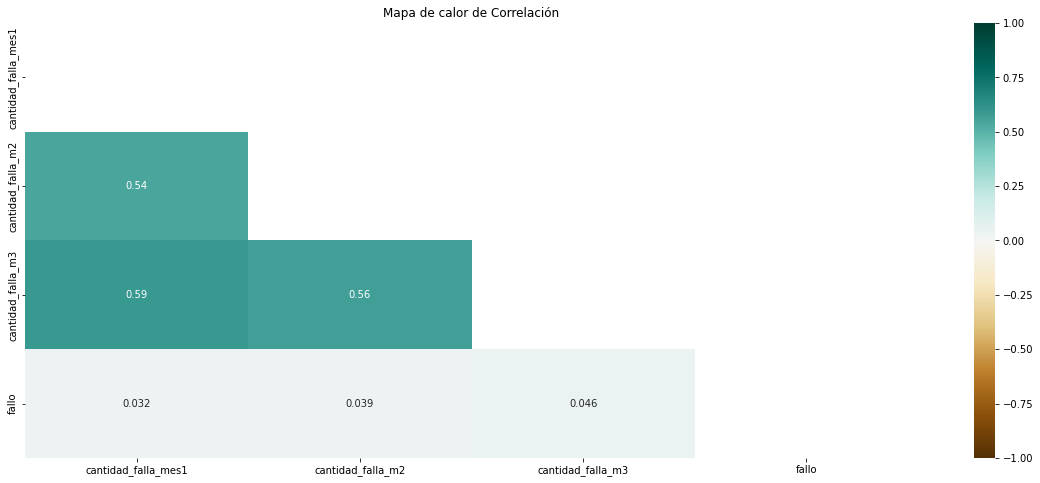

In [12]:
cant_mes = ["cantidad_falla_mes1", "cantidad_falla_m2", "cantidad_falla_m3", "fallo"]

plt.figure(figsize=(20,8))

# Se define una mascara para el trinagulo
mask = np.triu(np.ones_like(df[cant_mes].corr(), dtype=np.bool))
heatmap = sns.heatmap(
    df[cant_mes].corr(),
    mask = mask,
    vmin=-1,
    vmax=1,
    annot=True,
    cmap="BrBG"
)

heatmap.set_title("Mapa de calor de Correlación", fontdict={"fontsize":12})

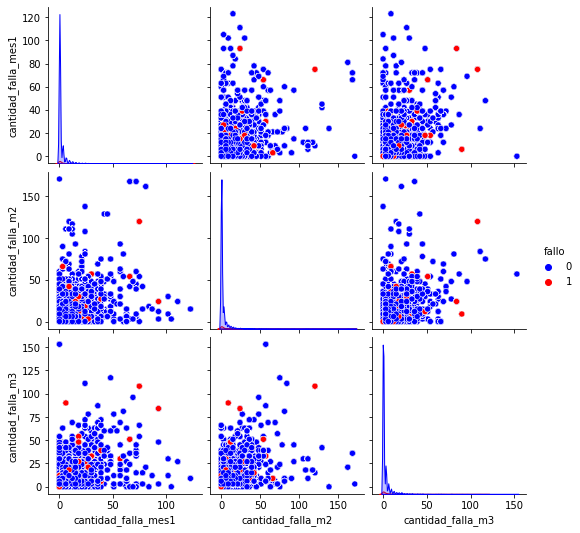

In [13]:
sns.pairplot(df[cant_mes], hue="fallo", palette=["b", "r"])

Text(0.5, 1.0, 'Mapa de calor de Correlación')

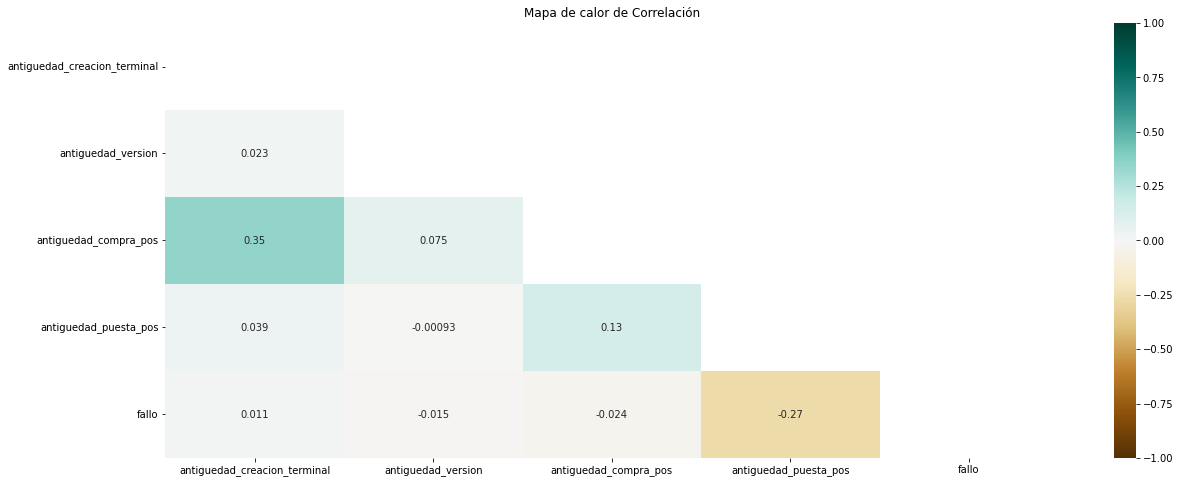

In [14]:
antiguedad = ['antiguedad_creacion_terminal', 
              'antiguedad_version',
              'antiguedad_compra_pos', 
              'antiguedad_puesta_pos',
              'fallo']


plt.figure(figsize=(20,8))

# Se define una mascara para el trinagulo
mask = np.triu(np.ones_like(df[antiguedad].corr(), dtype=np.bool))
heatmap = sns.heatmap(
    df[antiguedad].corr(),
    mask = mask,
    vmin=-1,
    vmax=1,
    annot=True,
    cmap="BrBG"
)

heatmap.set_title("Mapa de calor de Correlación", fontdict={"fontsize":12})

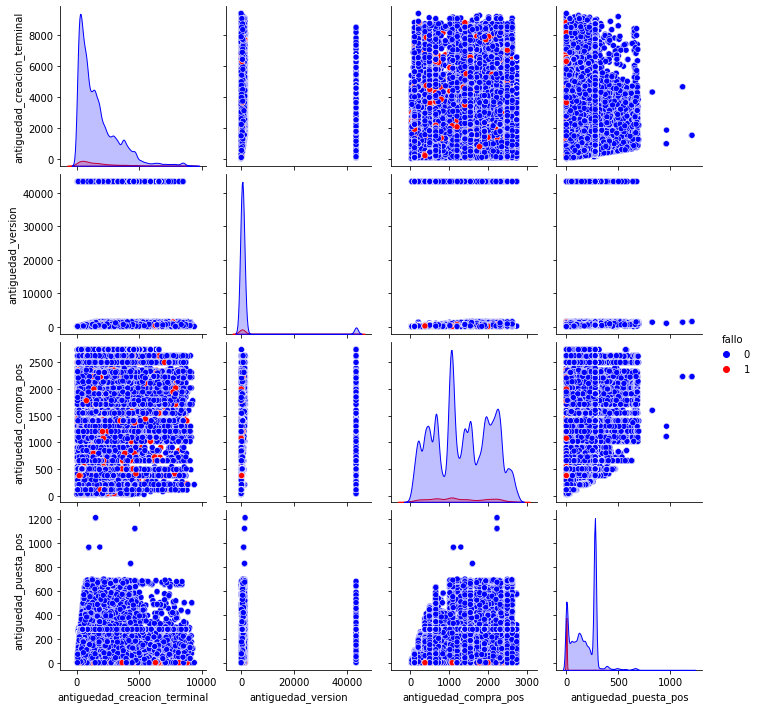

In [15]:
sns.pairplot(df[antiguedad], hue="fallo", palette=["b", "r"])

En este caso se evidencia subgrupos que se correlacionan entre si, esto podría traer problemas con la hipotesis de independencia lineal, sí se quisiera ajustar modelos lineales con núcleos Gaussianos. Sin embargo la intención de los cálculos anteriores van más encaminada a ver si las variables numéricas explican de alguna manera el fallo de la variable objetivo. Se puede evidenciar que la variable objetivo esta fuertemente desbalanceada


In [57]:
numerical_data = numerical_data.drop("fallo", axis=1)
numerical_data = numerical_data.drop([
    "trx_dia_cero",
    "trx_dia_uno",
    "trx_dia_dos",
    "trx_dia_tres",
    "trx_dia_cuatro",
    "trx_dia_cinco",
    "trx_dia_seis",
], axis=1)

### Variables Categóricas

In [13]:
categorical_data = data.select_dtypes('object')
categorical_data = categorical_data.drop(["fecha_fallo", "fecha_observacion"], axis=1)
categorical_data

,terminal,estado_terminal,producto_red,tecnologiapp,modelopp,tecnologiaaf,modeloaf,browser,nombretipoter,grupo_version,mcc,grupo_version_ant,ciudadfin,clase_falla
0,1062A26IO473,Activo,g,b,l,c,j,j,g,h,aaaaaj,k,CÚCUTA,a
1,1383G8382195,Activo,e,b,l,c,j,j,d,j,aaad,g,VILLAVICENCIO,a
2,1257A3QLV919,Activo,g,b,l,c,j,j,g,h,aab,g,BARRANQUILLA,a
3,1301F6964522,Activo,u,b,l,c,j,i,g,g,p,e,NEIVA,a
4,1693A39LE695,Activo,g,b,l,c,j,j,g,h,aaaaf,k,COTA,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199993,1921A2WOX254,Activo,o,b,d,c,c,j,g,h,aaaap,k,BOGOTÁ,a
199994,102240269351,Activo,k,a,j,b,i,j,i,h,aax,k,BOGOTÁ,a
199995,107349350777,Activo,f,b,d,c,c,j,d,h,aaaaab,k,BUCARAMANGA,a
199996,1866A2WP2351,Activo,o,b,d,c,c,j,g,h,aaaap,k,BOGOTÁ,a


Inicialmente se hace un prueba $\chi^{2}$, para identificar si la variable "tecnologiaapp" y "fallo" están relacionadas entre sí. Se empieza por definir la hipótesis nula $H_0$ que establece que no existe relación entre las variables. Para esto se verifica la hipótesis usando el p-valor.

Se define un factor de significancia para determinar si la relación entre las variables tiene una significacia considerable. Generalmente se elige un factor de significancia $\alpha = 0.05$. Este valor denota la probabilidad de rechazar erróneamente $H_{0}$ cuando es verdadera. Se elige un valor $\alpha$ más bajo en los caos en que esperamos más precisión. Si el p-valor de la prueba resulta ser estrictamente mayor que el valor alfa, entonces $H_0$ se cumple

In [8]:
# Se define la hipótesis Nula
cont = pd.crosstab(data["tecnologiapp"], data["fallo"], margins=True).T
stat, p, dof, expected = stats.chi2_contingency(cont)
alpha = 0.05
print(f"p-valor = {p}")
if p <= alpha:
    print("Dependiente, Rechazamos la hipótesis H0")
else:
    print("Independiente, H0 se cumple")
cont


p-valor = 0.0
Dependiente, Rechazamos la hipótesis H0


tecnologiapp,a,b,c,d,All
fallo,,,,,
0,147024,44963,23,121,192131
1,4085,3782,0,0,7867
All,151109,48745,23,121,199998


In [9]:
# Se imprime la tabla en porcentajes
count_p = pd.crosstab(data["tecnologiapp"], data["fallo"], margins=True, normalize="columns").T
count_p.applymap(lambda x: f"{x:0.2f}")

tecnologiapp,a,b,c,d
fallo,,,,
0,0.77,0.23,0.00,0.00
1,0.52,0.48,0.00,0.00
All,0.76,0.24,0.00,0.00


In [10]:
# Se imprime la tabla esperada
expected = pd.DataFrame(expected).applymap(lambda x: f"{x:0.0f}")
expected

,0,1,2,3,4
0,145165,46828,22,116,192131
1,5944,1917,1,5,7867
2,151109,48745,23,121,199998


En orden de analizar si con esta prueba las demás variables categóricas son dependendientes o no con la variable objetivo se realiza un función para agilizar la comparación

In [11]:
def chi2_test(data, v1, v2, percentage = False):
    print(v1)
    if percentage == False:
        cont = pd.crosstab(data[v1], data[v2], margins=True).T
    else:
        cont = pd.crosstab(data[v1], data[v2], margins=True, normalize="columns").T
        cont.applymap(lambda x: f"{x:0.2f}")

    stat, p, dof, expected = stats.chi2_contingency(cont)
    alpha = 0.05
    print(f"p-valor = {p}")
    if p <= alpha:
        print("Dependiente, Rechazamos la hipótesis H0")
    else:
        print("Independiente, H0 se cumple")
    return cont


In [12]:
for i in categorical_data:
    cont = chi2_test(data, i, "fallo")
    print(cont)
    print("")
    

terminal
p-valor = 1.0
Independiente, H0 se cumple
terminal  11366367  14385613  15255435  15502728  16432451  16564579  \
fallo                                                                  
0                1         0         0         1         1         1   
1                0         1         1         0         0         0   
All              1         1         1         1         1         1   

terminal  17691700  17935325  19285604  101735880  ...  2000ZF721424  \
fallo                                              ...                 
0                1         0         0          1  ...             1   
1                0         1         1          0  ...             0   
All              1         1         1          1  ...             1   

terminal  2000ZI165588  2000ZI618365  2000ZP383695  2000ZQ622906  \
fallo                                                              
0                    1             1             1             1   
1                    0 

Después de revisar todas las variables categóricas se tiene que son independientes las variables **terminal, estado_terminal, ciudadfin, clase_falla**. De tal manera que no se tienen evidencias estadísticamente fuertes para descartar más variables sino solo las mencionadas anteriormente. Por tanto a nivel de variables categóricas las demás influyen sobre la variable **fallo**

In [14]:
categorical_data = categorical_data.drop(["terminal", "estado_terminal", "ciudadfin", "clase_falla"], axis=1)
categorical_data

,producto_red,tecnologiapp,modelopp,tecnologiaaf,modeloaf,browser,nombretipoter,grupo_version,mcc,grupo_version_ant
0,g,b,l,c,j,j,g,h,aaaaaj,k
1,e,b,l,c,j,j,d,j,aaad,g
2,g,b,l,c,j,j,g,h,aab,g
3,u,b,l,c,j,i,g,g,p,e
4,g,b,l,c,j,j,g,h,aaaaf,k
...,...,...,...,...,...,...,...,...,...,...
199993,o,b,d,c,c,j,g,h,aaaap,k
199994,k,a,j,b,i,j,i,h,aax,k
199995,f,b,d,c,c,j,d,h,aaaaab,k
199996,o,b,d,c,c,j,g,h,aaaap,k


Se quiere ver la distribución de las variables categóricas

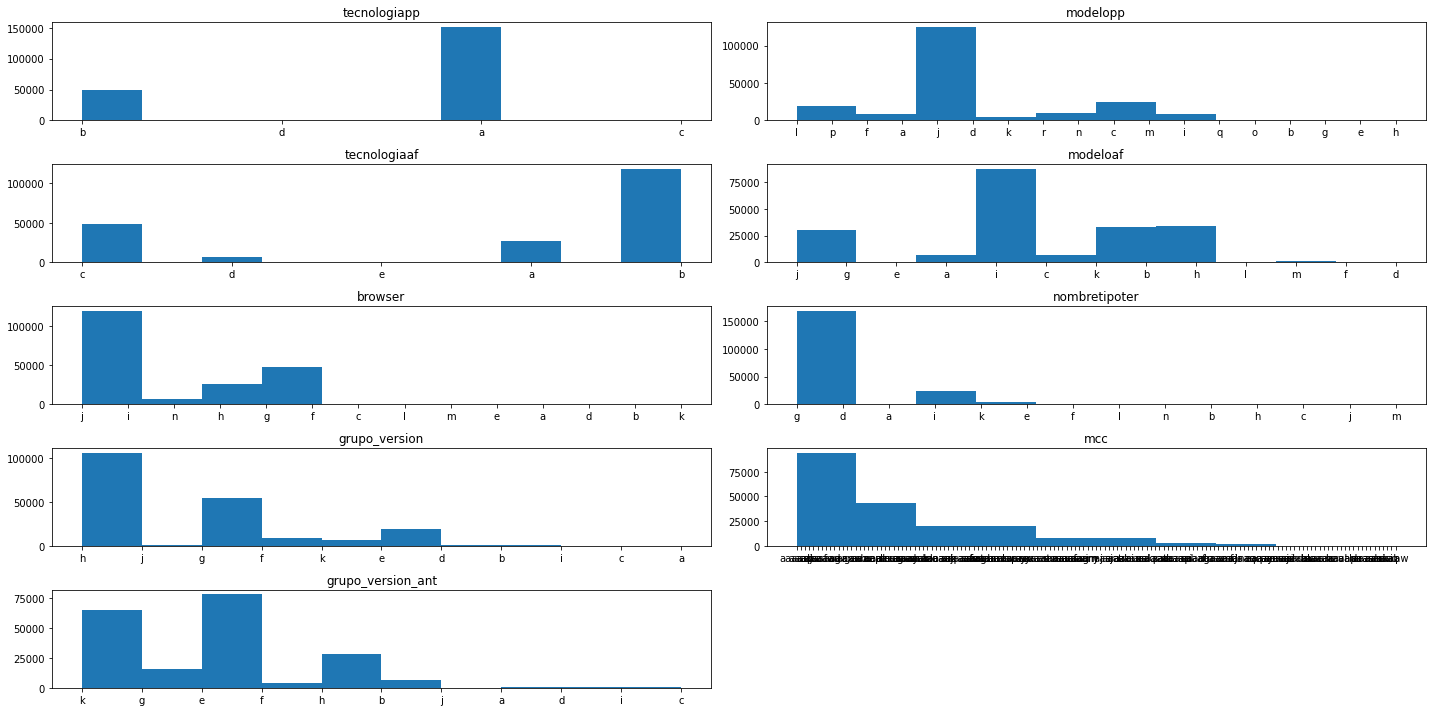

In [14]:
fig = plt.figure(figsize=(20,10))
columns = 2
rows = 5
for i in range(1,10):
    fig.add_subplot(rows, columns, i)
    plt.hist(x=categorical_data[categorical_data.columns[i]])
    plt.title(categorical_data.columns[i])
fig.tight_layout()

En particular se profundiza sobre algunas variables categóricas


Text(0.5, 1.0, 'Tecnología de la app')

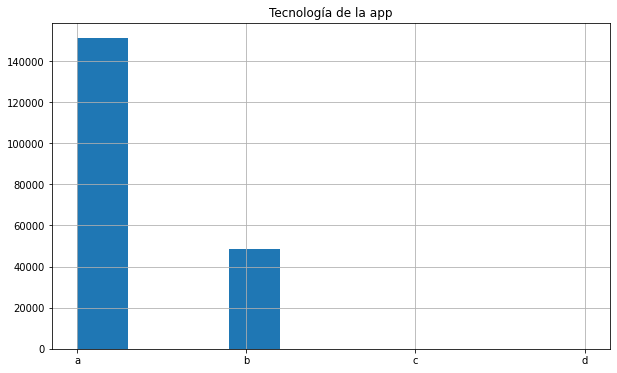

In [15]:
plt.figure(figsize=(10,6))
categorical_data["tecnologiapp"].sort_values().hist()
plt.title("Tecnología de la app")

Se espera que la tecnología por cada dispositivo asociada a la terminal esté relacionada con el fallo. Esto podría determinar el fallo

Text(0.5, 1.0, 'Modelo App')

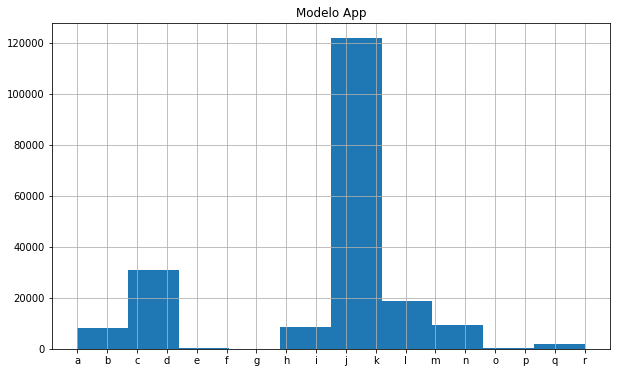

In [16]:
plt.figure(figsize=(10,6))
categorical_data["modelopp"].sort_values().hist()
plt.title("Modelo App")


Se espera que el modelo del dispositivo se asocie con el fallo generado. Podría determinar o explicar algo en el fallo

Text(0.5, 1.0, 'Navegador')

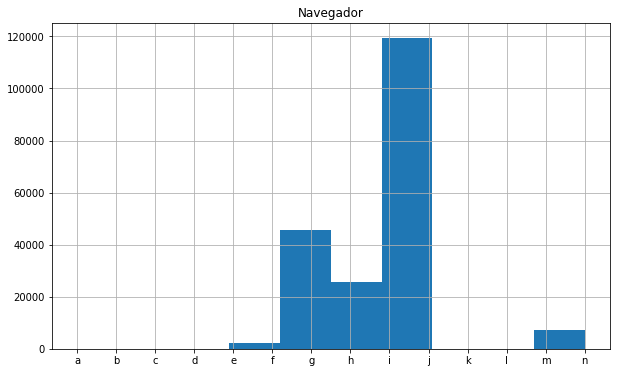

In [17]:
plt.figure(figsize=(10,6))
categorical_data["browser"].sort_values().hist()
plt.title("Navegador")

Se puede esperar que el navegador en el cual corre la aplicación este ralacionada con el fallo. Podrían determinar el fallo

Text(0.5, 1.0, '')

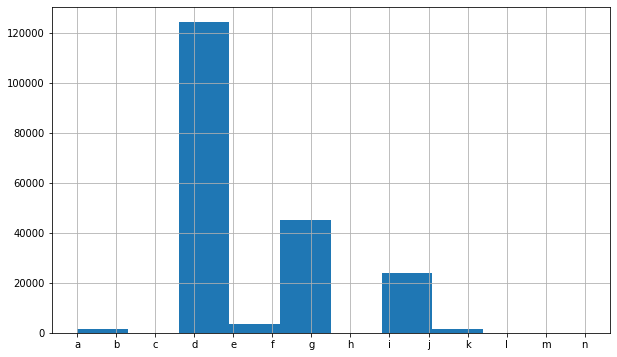

In [18]:
plt.figure(figsize=(10,6))
categorical_data["nombretipoter"].sort_values().hist()
plt.title("")

La terminal lógica se espera que esté relacionada con el fallo del dispositivo. El tipo de configuración del terminal puede determinar el fallo del dispositivo

### Variables temporales

Se consideran las variables temporales que se tienen

In [15]:
temporal_data = data[["fecha_fallo", "fecha_observacion", "fallo"]]
temporal_data["fecha_fallo"] = pd.to_datetime(temporal_data["fecha_fallo"], dayfirst=True).dt.date
temporal_data["fecha_observacion"] = pd.to_datetime(temporal_data["fecha_observacion"], dayfirst=True).dt.date
 

Por ahora no se quiere solucionar problemas con resolución temporal que estén en unidades de horas, se restringe el ejercicip a dias, por lo tanto se remueve la fecha 

In [16]:
# Se revisa el rango de fechas de las fechas de fallo
min_fallo = temporal_data[temporal_data["fecha_fallo"].isnull() != True]["fecha_fallo"].min()
max_fallo = temporal_data[temporal_data["fecha_fallo"].isnull() != True]["fecha_fallo"].max()
print(f"Primera fecha de fallo {min_fallo}, última fecha de fallo {max_fallo}")

Primera fecha de fallo 2018-10-15, última fecha de fallo 2018-11-20


Se tiene casi que un año en registros, esto permite hacer varios grupos de entrenamiento. Veamos como son los fallos a lo largo del tiempo

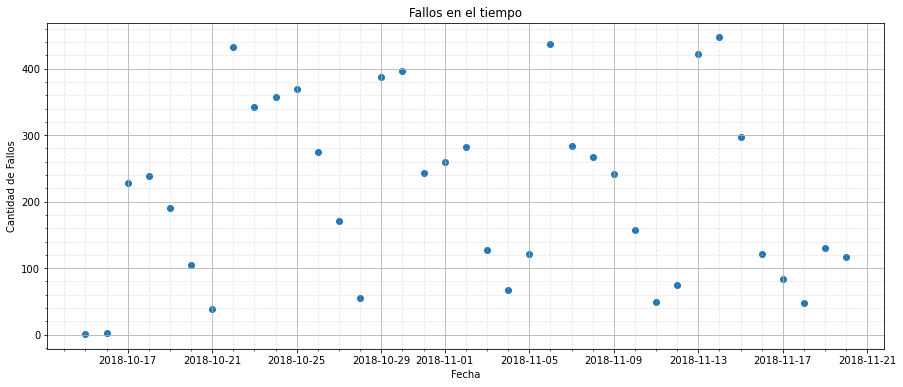

In [17]:
plt.figure(figsize=(15,6))
x = list(temporal_data.groupby("fecha_fallo")["fallo"].sum().index)
y = temporal_data.groupby("fecha_fallo")["fallo"].sum().values
plt.scatter(x,y)
#plt.vlines(x=datetime.date(2018, 30, 9), ymin = 0, ymax=max(y), colors="green")
#plt.plot(temporal_data.groupby("fecha_fallo")["fallo"].sum())
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Fallos")
plt.title("Fallos en el tiempo")
plt.grid(b=True, which="major", linestyle='-')
plt.grid(b=True, which="minor", linestyle='--', alpha=0.3)
plt.minorticks_on()


A finales de Septiembre se tiene un incremento evidente en los fallos, debe existir alguna razón para que se de este incremento

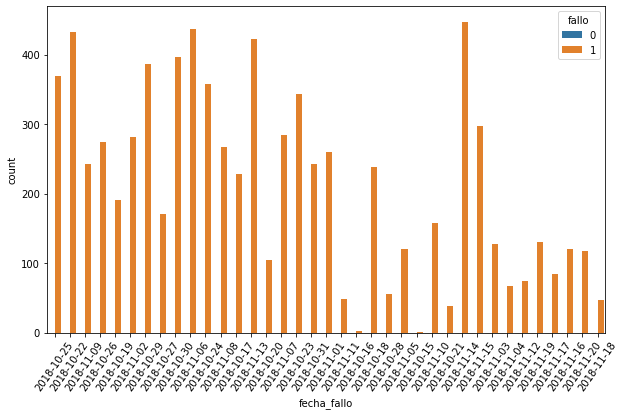

In [22]:
plt.figure(figsize=(10,6))
ax1 = sns.countplot(x="fecha_fallo", hue="fallo", data=temporal_data)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=55)
plt.grid(b=True, which="major", linestyle='-')
plt.grid(b=True, which="minor", linestyle='--', alpha=0.3)
plt.minorticks_on()


**2. ¿Se requiere llevar a cabo algún tratamiento adicional a los datos?, ¿Cuál o cuáles? Explique con comentarios**

Se puede requerir, tengo pensado dos tratamientos adicionales. Sin embargo no se presentan porque se debe asentar un modelo base para tener una ruta clara de mejoramiento , unas métricas adecuadas.

El primero sería encontrar valores atípicos en los con diagramas de cajas en las variables numéricas, para entender el contexto de la variable. En lo siguiente lo necesario sería utilizar métodos de aprendizaje no supervizado para eliminar tales outliers (IsolatinFores, K-vecinos). Esto teniendo en cuenta que vaya en favor de el mejoramiento de las métricas.

Lo segundo será hacer un análisis de componentes principales, esto con el fin de reducir la complejidad de los datos explicativos, para mitigar el computo numérico y quedarse con las variables que realmente afecten los datos. 

**3. Lleve a cabo dos técnicas de Machine Learning que permitan predecir si una terminal transaccional falla en los siguientes 7 a 37 días (falle en T+7 a T+37). Comente acerca de las dos metodologías usadas y los diferentes pasos o etapas que se llevaron a cabo**

**Nota:** Es de su elección dividir los registros para que pueda llevar a cabo la fase de entrenamiento, validación y pruebas. Se espera que el modelo entregue el mayor porcentaje de Precisión posible y un Recall no meno al 30%

Ahora se hace la preparación de los datos para pasar a los modelos propuestos, en primer lugar  se hace una codificación de las variables categóricas

In [18]:
x_categorical = pd.get_dummies(categorical_data)
x_categorical

,producto_red_a,producto_red_aa,producto_red_ab,producto_red_ac,producto_red_ad,producto_red_ae,producto_red_af,producto_red_b,producto_red_c,producto_red_d,...,grupo_version_ant_b,grupo_version_ant_c,grupo_version_ant_d,grupo_version_ant_e,grupo_version_ant_f,grupo_version_ant_g,grupo_version_ant_h,grupo_version_ant_i,grupo_version_ant_j,grupo_version_ant_k
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
199994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
199995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
199996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Se unen los datos catergóricos y numéricos como variables explicativas

In [19]:
X = pd.concat([numerical_data, x_categorical], axis=1)
X

,trx_dia_cero,trx_dia_uno,trx_dia_dos,trx_dia_tres,trx_dia_cuatro,trx_dia_cinco,trx_dia_seis,trx_mes_tres,trx_mes_dos,trx_mes_uno,...,grupo_version_ant_b,grupo_version_ant_c,grupo_version_ant_d,grupo_version_ant_e,grupo_version_ant_f,grupo_version_ant_g,grupo_version_ant_h,grupo_version_ant_i,grupo_version_ant_j,grupo_version_ant_k
0,63,0,0,0,0,3,57,186,660,66,...,0,0,0,0,0,0,0,0,0,1
1,39,57,54,48,24,6,0,855,960,228,...,0,0,0,0,0,1,0,0,0,0
2,3,9,6,3,9,12,0,186,300,42,...,0,0,0,0,0,1,0,0,0,0
3,9,30,21,18,12,24,0,495,390,114,...,0,0,0,1,0,0,0,0,0,0
4,18,21,3,21,3,9,6,117,180,75,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199993,0,0,0,3,0,3,6,75,51,33,...,0,0,0,0,0,0,0,0,0,1
199994,201,171,126,255,192,222,180,5706,7047,3282,...,0,0,0,0,0,0,0,0,0,1
199995,0,0,3,3,0,0,18,1257,903,429,...,0,0,0,0,0,0,0,0,0,1
199996,0,0,0,6,12,3,3,60,66,48,...,0,0,0,0,0,0,0,0,0,1


Ahora se hace la construcción de la variable objetivo

In [20]:
temporal_data["dias"] = 0
mask = temporal_data["fecha_fallo"].isnull() == False

days = temporal_data[mask]["fecha_fallo"]-temporal_data[mask]["fecha_observacion"]

#y = np.zeros((len(data),37))
#for i in range(len(days)):
#    y[days.index[i], days.iloc[i].days-1] = 1
y = np.zeros(len(data))
for i in range(len(days)):
    y[days.index[i]] = days.iloc[i].days

y

array([ 0., 19.,  0., ...,  0.,  0.,  0.])

Se realiza la partición del conjunto de datos. Se elige una distribución de datos de la siguiente manera

* **Conjunto de entrenamiento(70%):** Es la muestra de datos para ajustar el modelo
* **Conunto de validacion(20%):** Es la muestra usada para proveer una evvaluacií imparcial de un modelo ajustado con los datos de entrenamiento mientras se ajusta los hiperparámetros del modelo. La validación se vuelve más sesgada a medida que la habilidad en el conjunto de datos de validación se incopora a la configuración del modelo
* **Conjunto de prueba(10%):** Es la muestra de datos usada para la evaluación imparcial del modelo final. El modelo nunca ha conocido estos datos y el objetivo es probar el desempeño del modelo con estos nuevos datos

In [21]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y,test_size=0.3, stratify=y, random_state=11)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem,test_size=2/3, stratify=y_rem,random_state=11)


In [22]:

print(f"% Entrenamiento = {len(y_train)/len(y)*100:.2f}")  
print(f'% Test : {len(y_test)/len(y)*100:.2f}')
print(f'% Val : {len(y_valid)/len(y)*100:.2f}') 

% Entrenamiento = 70.00
% Test : 20.00
% Val : 10.00


## Modelo 1

Se arma en primer lugar una regresion lineal

In [59]:
base_models = [
    ("Random Forest", RandomForestRegressor(
        random_state=11, 
        n_jobs=-1,
        verbose=2)),
    ("XGB", XGBRegressor(verbose=True)),
]

In [60]:
for name, model in base_models:
    start_time = time.time()
    
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    
    end_time = time.time()
    
    r2 = model.score(X_test, y_test)
    rmse = mean_squared_error(y_test, prediction, squared=False)
    
    print(f"*****************{name}******************")
    print(f"Coeficiente de Pearson = {r2}")
    print(f"Raiz cuadrada promedio = {rmse}")
    print(f"Tiempo de calculo {end_time-start_time}")
    print("*****************************************\n")
    

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100building tree 7 of 100

building tree 8 of 100

building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.5s


building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   43.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


*****************Random Forest******************
Coeficiente de Pearson = 0.39473791855002227
Raiz cuadrada promedio = 3.450517066527796
Tiempo de calculo 44.083086013793945
*****************************************

*****************XGB******************
Coeficiente de Pearson = 0.2702310838562896
Raiz cuadrada promedio = 3.7888300640482884
Tiempo de calculo 38.05155301094055
*****************************************



In [61]:
stack_model = StackingRegressor(
    estimators=base_models,
    final_estimator=RandomForestRegressor(
        random_state=11, 
        n_jobs=-1,
        verbose=2),
    cv=5
)

start_time = time.time()
 
stack_model.fit(X_train, y_train)
stack_model_prediction = stack_model.predict(X_test)

end_time = time.time()

stacked_r2 = stack_model.score(X_test, y_test)
stacked_rmse = mean_squared_error(y_test, stack_model_prediction, squared=False)

print("*****************Stack******************")
print(f"Coeficiente de Pearson = {stacked_r2}")
print(f"Raiz cuadrada promedio = {stacked_rmse}")
print(f"Tiempo de calculo {end_time-start_time}")
print("*****************************************\n")
    

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   48.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   37.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   39.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]:

building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100

building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


*****************Stack******************
Coeficiente de Pearson = 0.2814355038679719
Raiz cuadrada promedio = 3.7596318826011177
Tiempo de calculo 512.329293012619
*****************************************



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


building tree 7 of 100
building tree 10 of 100
building tree 18 of 100
building tree 29 of 100
building tree 38 of 100
building tree 42 of 100
building tree 52 of 100
building tree 61 of 100
building tree 69 of 100
building tree 77 of 100
building tree 85 of 100
building tree 93 of 100
building tree 1 of 100
building tree 11 of 100
building tree 20 of 100
building tree 28 of 100
building tree 36 of 100
building tree 47 of 100
building tree 54 of 100
building tree 59 of 100
building tree 67 of 100
building tree 77 of 100
building tree 85 of 100
building tree 93 of 100
building tree 1 of 100
building tree 15 of 100
building tree 24 of 100
building tree 29 of 100
building tree 39 of 100
building tree 46 of 100
building tree 55 of 100
building tree 63 of 100
building tree 71 of 100
building tree 79 of 100
building tree 87 of 100
building tree 95 of 100
building tree 8 of 100
building tree 14 of 100
building tree 22 of 100
building tree 31 of 100
building tree 39 of 100
building tree 47 of 

In [56]:
model = RandomForestRegressor(
        random_state=11, 
        n_jobs=-1,
        verbose=2)

start_time = time.time()
    
model.fit(X_train, y_train)
prediction = model.predict(X_test)
    
end_time = time.time()
    
r2 = model.score(X_test, y_test)
rmse = mean_squared_error(y_test, prediction, squared=False)
    
print(f"*****************Random Forest******************")
print(f"Coeficiente de Pearson = {r2}")
print(f"Raiz cuadrada promedio = {rmse}")
print(f"Tiempo de calculo {end_time-start_time}")
print("*****************************************\n")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100building tree 3 of 100building tree 4 of 100building tree 5 of 100building tree 6 of 100building tree 7 of 100building tree 8 of 100







building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100building tree 39 of 100



[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s


building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100building tree 60 of 100

building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100building tree 75 of 100

building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


*****************Random Forest******************
Coeficiente de Pearson = 0.8527190692654489
Raiz cuadrada promedio = 1.7015793345155088
Tiempo de calculo 5.808565139770508
*****************************************



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


## Modelo 2

Para este modelo se hace una implementación de una red neuronal simple para ver el rendimiento comparado con el modelo anterior. La idea principal es hacer una red densa que tenga mezcladas las funciones de calculo para poder manejar la dependencia lineal entre variables explicativas


In [29]:
X_train_nn = np.array(X_train)
X_train_nn = X_train_nn.reshape(X_train_nn.shape[0], X_train_nn.shape[1], 1) 

X_test_nn = np.array(X_test)
X_test_nn = X_test_nn.reshape(X_test_nn.shape[0], X_test_nn.shape[1], 1) 

X_valid_nn = np.array(X_valid)
X_valid_nn = X_valid_nn.reshape(X_valid_nn.shape[0], X_valid_nn.shape[1], 1) 

In [51]:
model2 = keras.Sequential()

model2.add(keras.layers.Dense(32, input_shape=(X_train_nn.shape[1], 1), activation="selu"))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(8, activation='tanh'))
model2.add(keras.layers.Dense(2, activation='elu'))
model2.add(keras.layers.Dense(1, activation='linear'))

model2.compile(
    loss=[keras.losses.MeanAbsoluteError()],
    optimizer="Adam",
    metrics=["mse"]
)

print(model2.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 287, 32)           64        
_________________________________________________________________
flatten_10 (Flatten)         (None, 9184)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 8)                 73480     
_________________________________________________________________
dense_36 (Dense)             (None, 2)                 18        
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 3         
Total params: 73,565
Trainable params: 73,565
Non-trainable params: 0
_________________________________________________________________
None


In [52]:
batch_size=4
epochs = 5

model2 = model2.fit(
    X_train_nn, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_test_nn, y_test)
)

Train on 139998 samples, validate on 40000 samples
Epoch 1/5
139998/139998 [==============================] - 195s 1ms/sample - loss: 0.8205 - mse: 20.3104 - val_loss: 0.8217 - val_mse: 20.3341
Epoch 2/5
139998/139998 [==============================] - 198s 1ms/sample - loss: 0.8201 - mse: 20.3109 - val_loss: 0.8199 - val_mse: 20.3303
Epoch 3/5
139998/139998 [==============================] - 201s 1ms/sample - loss: 0.8200 - mse: 20.3109 - val_loss: 0.8204 - val_mse: 20.3292
Epoch 4/5
139998/139998 [==============================] - 200s 1ms/sample - loss: 0.8199 - mse: 20.3109 - val_loss: 0.8200 - val_mse: 20.3310
Epoch 5/5
139998/139998 [==============================] - 199s 1ms/sample - loss: 0.8198 - mse: 20.3110 - val_loss: 0.8203 - val_mse: 20.3317


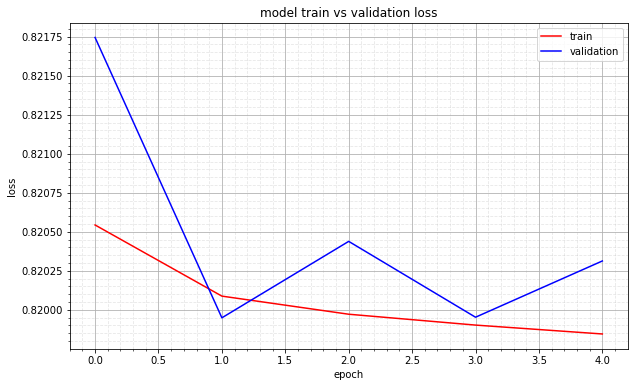

In [53]:
plt.figure(figsize=(10,6))
plt.plot(model2.history['loss'][1:], "r")
plt.plot(model2.history['val_loss'][1:], "b")
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid(b=True, which="major", linestyle='-')
plt.grid(b=True, which="minor", linestyle='--', alpha=0.3)
plt.minorticks_on()


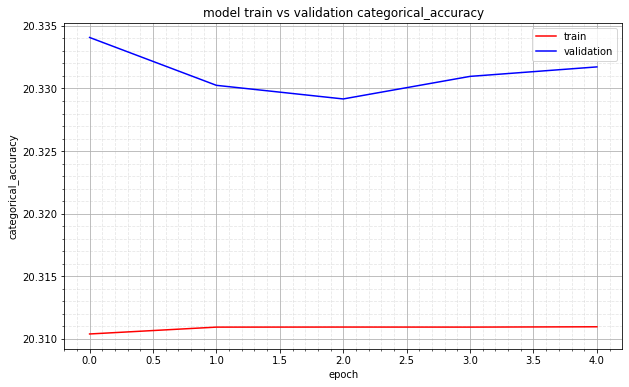

In [54]:
plt.figure(figsize=(10,6))
plt.plot(model2.history['mse'][1:], "r")
plt.plot(model2.history['val_mse'][1:], "b")
plt.title('model train vs validation categorical_accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid(b=True, which="major", linestyle='-')
plt.grid(b=True, which="minor", linestyle='--', alpha=0.3)
plt.minorticks_on()


**4. Comente los resultados de los modelos desarrollados. ¿Por qué considera que son buenos modelos? ¿Qué medidas de bondad de auste considera adecuadas para realziar en sus modelos?**

## Modelo 1

Para este modelo se tiene un rendimiento muy bajo, se abordo el problema desde los algoritmos tradicionales del aprendizaje automatizado, esto con el fin de asentar un modelo base para ir avanzando en el pre procesamiento de datos. En este modelo precisamente se tiene un problema de independencia lineal en las variables explicativas, por esta razón la discrepncia entre los valores observados y los valores esperados es tan amplia. Lo que se debe hacer es crear variables sintéticas que reemplazen las variables fuertemente correlacionadas y condensen la información que aportan al modelo, además de esto  hacer una busqueda de hiperparámetros cuando se cuente con un poder de computo mas alto para mejorar las métricas de rendimiento

## Modelo 2

Se tiene una red neuronal básica que consiste nada más en capas densas. Se quería ver si tiene potencial considerar una red neuronal para este caso. En mi opinión tiene este método más versatilidad que muchas de las regresiones consideradas en medio del proceso. Se debe encontrar una arquitectura adecuada para maximizar los resultados del modelo, quizás en primer momento se puede crear una arquitectura de redes neuronales siamesas para poder perfilar las variables de acuerdo a su naturaleza, a que me refiero, a que podrían usarse funciones de activaión para operar en variables categóricas y otras diferentes para variables numéricas y al final unir estos calculo para dar un sola predicción, considero que esta hipótesis puede potencializar y aumentar la bondad estadística del sistema

**5. ¿Cuáles son la svariables más relevantes cuando falla una terminal transaccional y cómo las identifica?**

Como es natural, la explicabilidad de un modelo clásico de Aprendizaje automatizado como el Random Forest que elegimos para el entrenamiento tiene una interpretación más sencilla, los pesos ajustados de la regresión se tienen facilmente y se pueden ver de la siguiente manera

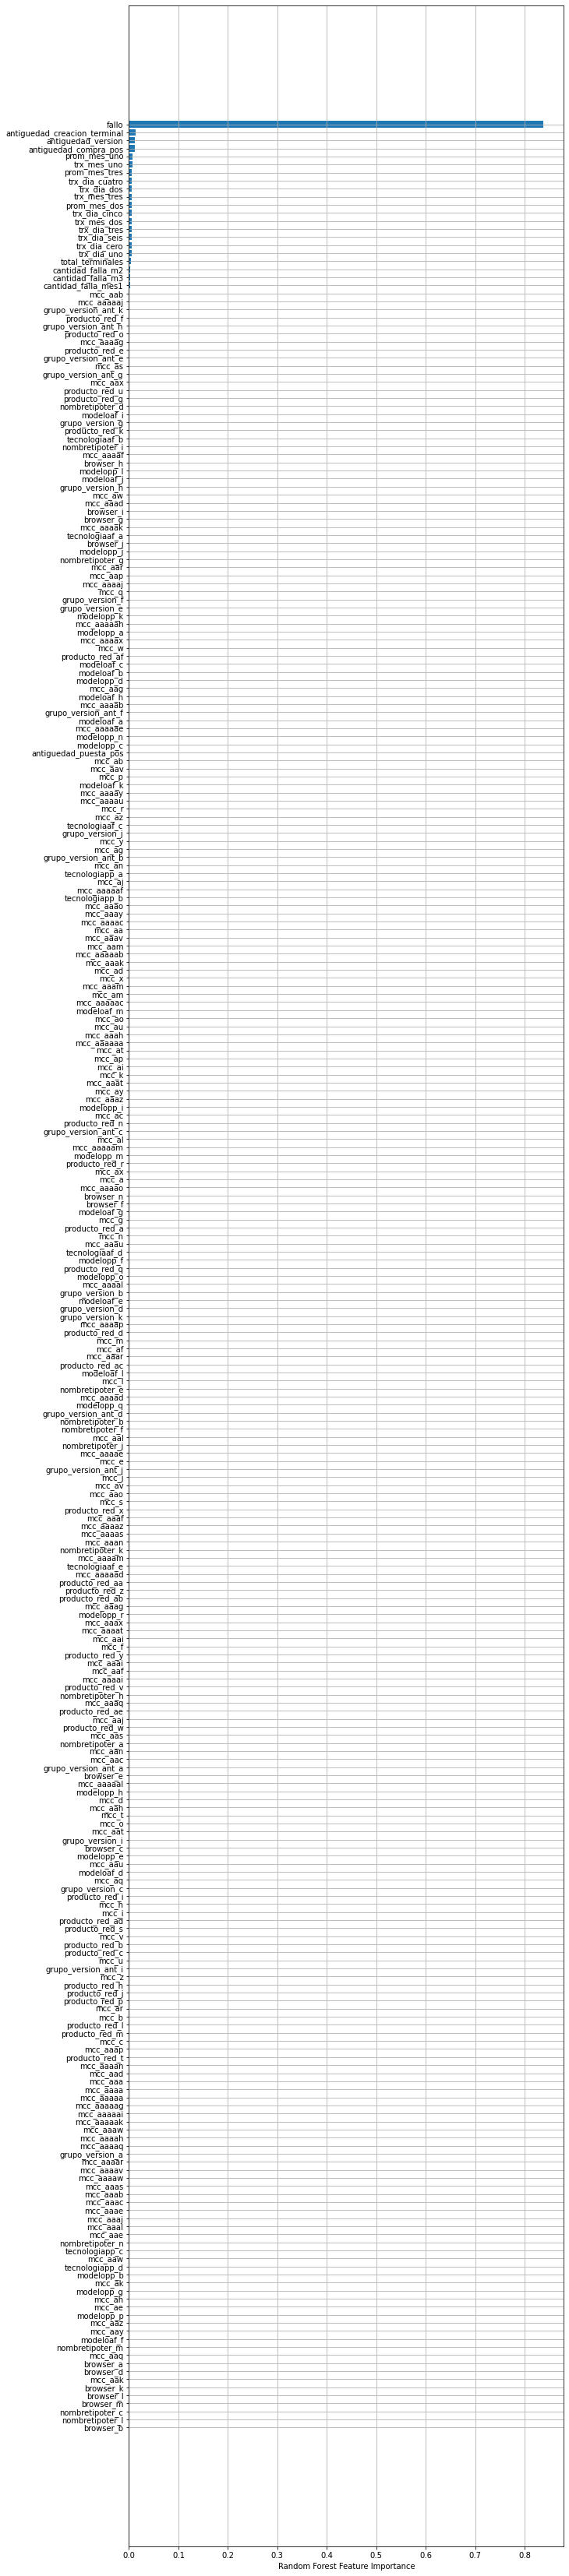

In [66]:
#model.feature_importances_
#sorted_idx = rf.feature_importances_.argsort()
#plt.barh(X_train.columns, model.feature_importances_)
plt.figure(figsize=(10,60))

sorted_idx = model.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.grid(b=True, which="major", linestyle='-')
plt.grid(b=True, which="minor", linestyle='--', alpha=0.3)


Para el caso de la red Neuronal es un poco más difícil interpretar los pesos de la red, dado que se mezclan los pesos de las redes neuronales. Sin embargo se puede personalizar y potencializar mucho más esta tarea

**6. ¿Qué estrategias recomendaría usted implementar para reducir el riesgo de falla de una terminal transaccional?**

Es claro que las métricas que tenemos no son las mejores, sin embargo este primer modelo nos habla de algo, es claro que según el análisis de la importancia de las variables a la predicción se debe considera unas variables especieales:

* Antiguedad de la creación de la terminal
* Antiguedad de la versión
* Antiguedad compra pos
* Total terminales
* Transacción en operaciones

No incluyo en mi conclusión las variables del conteo de operaciones porque se puede condensar todo en una variable que puedo proponer como "Transacción en operaciones". Es un primer análsis que estoy seguro se puede ver desde una óptica más profunda con un poco más de tiempo. Sin embargo en aras de dar una respuesta rápida al negocio, propongo sea revisada estas variables para mitigar el fallo en las terminales

**7. ¿Qué variables adicionales propondría usted incorporar en este análisis y así mejorar la capacidad de predicción de sus modelos?**

Podría pensar en un análisis diferente para esta predicción. La construcción de la variable objetivo fue calcular los días en los cuales va a fallar una terminal dada, teniendo en cuenta todas las variables explicativas. Por otra parte se podría pensar en mas bien predecir un vector, que podríamos llamar de suceso. Tal vector que se propone $\vec{y_{T}}$tendría la longitud de la venta temporal de predicción. Entonces lo que se tendría que predecir es en qué lugar del vector es más probable que aparezca el número 1.


